In [2]:
!pip install spacy

    100% |████████████████████████████████| 30.8MB 1.7MB/s eta 0:00:011
    100% |████████████████████████████████| 3.2MB 23.7MB/s eta 0:00:01
    100% |████████████████████████████████| 2.1MB 28.9MB/s eta 0:00:01
    100% |████████████████████████████████| 184kB 57.6MB/s eta 0:00:01
    100% |████████████████████████████████| 92kB 49.5MB/s ta 0:00:01
    100% |████████████████████████████████| 51kB 40.5MB/s ta 0:00:01
You are using pip version 10.0.1, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [7]:
!python -m spacy download en_core_web_lg
!python -m spacy link en_core_web_lg web_lg --force

    100% |████████████████████████████████| 826.9MB 68.8MB/s ta 0:00:011  4% |█▌                              | 39.3MB 54.7MB/s eta 0:00:15    11% |███▌                            | 91.4MB 49.2MB/s eta 0:00:15    24% |████████                        | 206.0MB 80.0MB/s eta 0:00:08    30% |█████████▉                      | 254.5MB 6.9MB/s eta 0:01:23    37% |████████████                    | 309.3MB 98.1MB/s eta 0:00:06    47% |███████████████▏                | 392.5MB 64.4MB/s eta 0:00:07    61% |███████████████████▊            | 510.5MB 38.1MB/s eta 0:00:09    67% |█████████████████████▍          | 554.1MB 39.6MB/s eta 0:00:07    83% |██████████████████████████▋     | 687.7MB 65.1MB/s eta 0:00:03    98% |███████████████████████████████▋| 818.2MB 14.7MB/s eta 0:00:01
  Running setup.py install for en-core-web-lg ... done
You are using pip version 10.0.1, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
✔ Download and install

In [1]:
from math import sqrt
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import spacy

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/sub-stats/ds/master/4-30-to-7-29-submissions.csv', low_memory=False)

In [3]:
nlp = spacy.load('web_lg')

In [4]:
plt.rcParams['figure.figsize'] = [10, 10]

In [5]:
col_to_parse = 'title'
df2 = pd.DataFrame()
for sub in ['askscience', 'AskHistorians', 'AskComputerScience',
       'AskCulinary', 'AskSocialScience', 'AskEngineers', 'askphilosophy']:
    condition = df['subreddit'] == sub
    df2 = df2.append(df[condition][[col_to_parse, 'subreddit']].sample(150))

In [6]:
df['subreddit'].unique()

array(['AskReddit', 'askscience', 'AskHistorians', 'AskComputerScience',
       'AskCulinary', 'TrueAskReddit', 'AskSocialScience', 'AskEngineers',
       'askphilosophy'], dtype=object)

In [7]:
tokens = []
lemma = []
pos = []
parsed_doc = [] 

for doc in nlp.pipe(df2[col_to_parse].astype('unicode').values, batch_size=50,
                        n_threads=3):
    if doc.is_parsed:
        parsed_doc.append(doc)
        tokens.append([n.text for n in doc])
        lemma.append([n.lemma_ for n in doc])
        pos.append([n.pos_ for n in doc])
    else:
        # We want to make sure that the lists of parsed results have the
        # same number of entries of the original Dataframe, so add some blanks in case the parse fails
        tokens.append(None)
        lemma.append(None)
        pos.append(None)


df2['parsed_doc'] = parsed_doc
df2['comment_tokens'] = tokens
df2['comment_lemma'] = lemma
df2['pos_pos'] = pos

In [8]:
df2.head()

,title,subreddit,parsed_doc,comment_tokens,comment_lemma,pos_pos
53908,Temperature and time relative?,askscience,"(Temperature, and, time, relative, ?)","[Temperature, and, time, relative, ?]","[temperature, and, time, relative, ?]","[NOUN, CCONJ, NOUN, ADJ, PUNCT]"
9825,Why can I only see this lens flair if both eye...,askscience,"(Why, can, I, only, see, this, lens, flair, if...","[Why, can, I, only, see, this, lens, flair, if...","[why, can, -PRON-, only, see, this, lens, flai...","[ADV, VERB, PRON, ADV, VERB, DET, NOUN, NOUN, ..."
6308,Why does my eyelid twitch occassiona,askscience,"(Why, does, my, eyelid, twitch, occassiona)","[Why, does, my, eyelid, twitch, occassiona]","[why, do, -PRON-, eyelid, twitch, occassiona]","[ADV, VERB, DET, ADJ, NOUN, NOUN]"
20278,What happens if you drink to much water?,askscience,"(What, happens, if, you, drink, to, much, wate...","[What, happens, if, you, drink, to, much, wate...","[what, happen, if, -PRON-, drink, to, much, wa...","[PRON, VERB, ADP, PRON, VERB, ADP, ADJ, NOUN, ..."
32354,What would happen if two neutron stars collide...,askscience,"(What, would, happen, if, two, neutron, stars,...","[What, would, happen, if, two, neutron, stars,...","[what, would, happen, if, two, neutron, star, ...","[PRON, VERB, VERB, ADP, NUM, NOUN, NOUN, VERB,..."


In [9]:
df2.shape

(1050, 6)

In [10]:
df2['subreddit'].value_counts()

AskEngineers          150
AskSocialScience      150
AskCulinary           150
askphilosophy         150
AskComputerScience    150
AskHistorians         150
askscience            150
Name: subreddit, dtype: int64

In [11]:
df3 = df2.copy()
df3 = df3.reset_index()

In [12]:
df3['parsed_doc'][0].similarity(df3['parsed_doc'][1])

0.7250039990831035

In [13]:
# Empty graph                            
raw_G = nx.Graph()
n = 0

# Iterate over every combination of two titles
for i_pos, i in enumerate(df3['parsed_doc']):
    for j in range(i_pos+1, len(df3['parsed_doc'])):
        # If mirrored edge not present, add edge
        if not (raw_G.has_edge(df3['parsed_doc'][j], i)):
            sim = i.similarity(df3['parsed_doc'][j])
            raw_G.add_edge(i, df3['parsed_doc'][j], weight = sim)
            n += 1

print(raw_G.number_of_nodes(), "nodes, and", raw_G.number_of_edges(), "edges created.")

/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)

/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)

/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)

/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)

/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)

/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)

/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)

/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)

/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)

/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)

/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)

/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)

/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)

/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)

/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/local/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)

1050 nodes, and 550725 edges created.


In [14]:
edges_to_kill = []
min_wt = 0.93      # this is our cutoff value for a minimum edge-weight 

for n, nbrs in raw_G.adj.items():
    for nbr, eattr in nbrs.items():
        # remove edges below a certain weight
        data = eattr['weight']
        if data < min_wt:
            edges_to_kill.append((n, nbr)) 
            
print("\n", len(edges_to_kill) / 2, "edges to kill (of", raw_G.number_of_edges(), "), before de-duplicating")


 549707.0 edges to kill (of 550725 ), before de-duplicating


In [15]:
for u, v in edges_to_kill:
    if raw_G.has_edge(u, v):   # catches (e.g.) those edges where we've removed them using reverse ... (v, u)
        raw_G.remove_edge(u, v)

In [16]:
strong_G = raw_G
print(strong_G.number_of_edges())

1018


In [17]:
title = df2['title'].to_list()
sub = df2['subreddit'].to_list()
sub_map = dict(zip(title, sub))

color_map = {'AskReddit':'black', 
             'askscience':'red', 
             'AskHistorians':'green', 
             'AskComputerScience':'blue',
             'AskCulinary':'yellow', 
             'TrueAskReddit':'orange', 
             'AskSocialScience':'purple', 
             'AskEngineers':'pink',
             'askphilosophy':'silver'}

color_list = []
for node in strong_G:
    color_list.append(color_map[sub_map[str(node)]])

/usr/local/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/usr/local/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


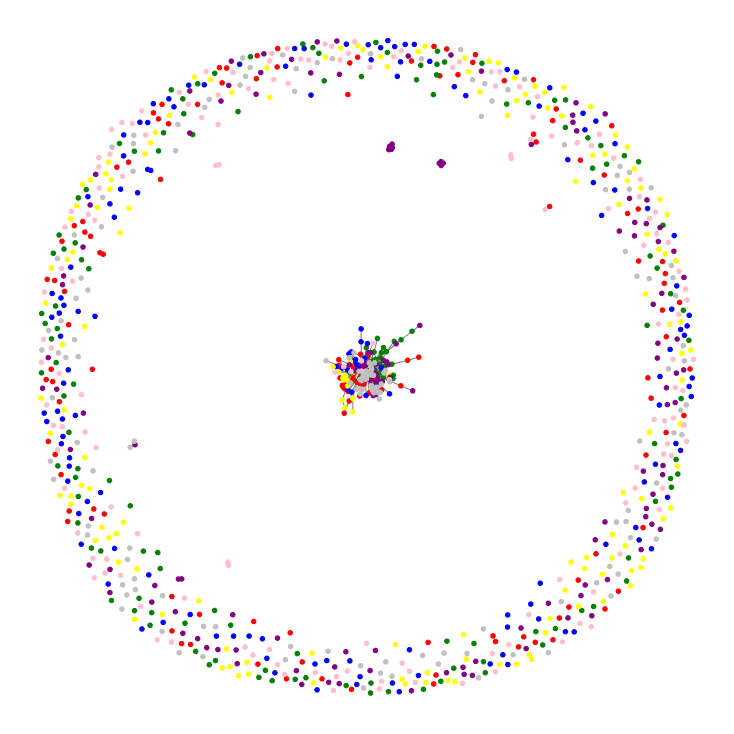

In [18]:
nx.draw(strong_G, node_size=20, edge_color='gray', node_color=color_list)

In [19]:
list(strong_G.nodes(data=True))

[(Temperature and time relative?, {}),
 (Why can I only see this lens flair if both eyes are open?, {}),
 (Why does my eyelid twitch occassiona, {}),
 (What happens if you drink to much water?, {}),
 (What would happen if two neutron stars collided? Would they just explode? Or would something else happen,
  {}),
 (How much time did the planes that dropped the atomic bombs over Japan have to get away from the blast?,
  {}),
 (Why can’t surgeons just cut out all the excess fat off morbidly obese people?,
  {}),
 (If we had three eyes or more, would we be able to see farther and more clearly?,
  {}),
 (Short reading with left eye and far vision with right eye, {}),
 (Why does menthol make water taste ice cold?, {}),
 (Why don’t kids seem to get as nauseous as adults do on rides?, {}),
 (Why speed of liquid change pitch of sound?, {}),
 (If you were stranded in space with just your spacesuit and no means to propel yourself, is it possible to turn your whole body around and face the opposit

In [20]:
strong_G.remove_nodes_from(list(nx.isolates(strong_G)))

In [21]:
title = df2['title'].to_list()
sub = df2['subreddit'].to_list()
sub_map = dict(zip(title, sub))

color_map = {'AskReddit':'silver', 
             'askscience':'red', 
             'AskHistorians':'green', 
             'AskComputerScience':'blue',
             'AskCulinary':'yellow', 
             'TrueAskReddit':'orange', 
             'AskSocialScience':'purple', 
             'AskEngineers':'pink',
             'askphilosophy':'black'}

color_list = []
for node in strong_G:
    color_list.append(color_map[sub_map[str(node)]])

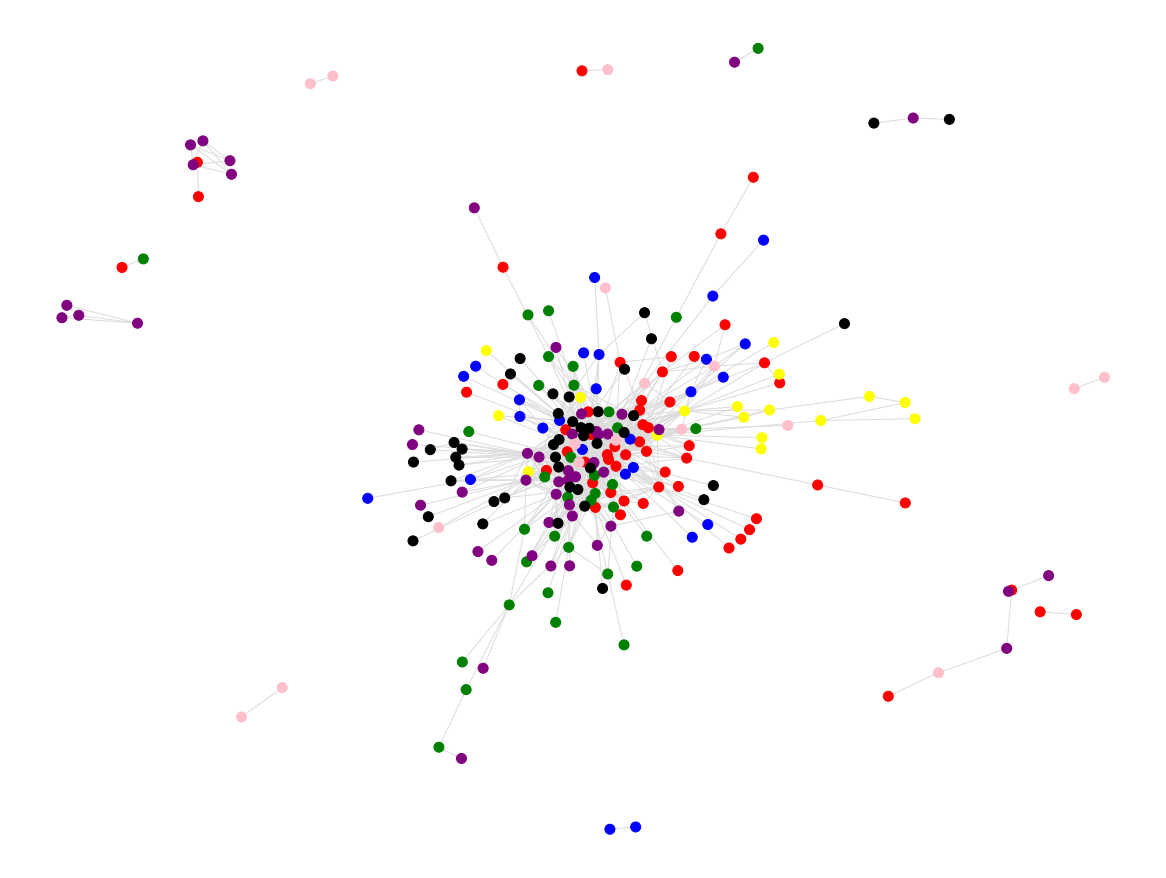

In [22]:
count = strong_G.number_of_nodes()
equilibrium = 10 / sqrt(count)    # default for this is 1/sqrt(n), but this will 'blow out' the layout for better visibility
plt.rcParams['figure.figsize'] = [16, 12]  # a better aspect ratio for labelled nodes
pos = nx.fruchterman_reingold_layout(strong_G, k=equilibrium, iterations=300)
nx.draw(strong_G, pos, node_size=100, edge_color='gainsboro', with_labels=False, node_color=color_list)

plt.show()

# Plotly Graph Port

In [24]:
import plotly as py
from plotly.graph_objs import *

py.tools.set_credentials_file(username='urza1302', api_key='mk5i5xr6hdxZlUbb7fEQ')

In [29]:
pos = nx.fruchterman_reingold_layout(pickle_G)
E = [e for e in pickle_G.edges.data()]

In [30]:
Xv=[pos[key][0] for key in pos]
Yv=[pos[key][1] for key in pos]
Xed=[]
Yed=[]
for edge in E:
    Xed+=[pos[edge[0]][0], pos[edge[1]][0], None]
    Yed+=[pos[edge[0]][1], pos[edge[1]][1], None]

trace1=Scatter(x=Xed,
               y=Yed,
               mode='lines',
               line=dict(color='rgb(210,210,210)', width=1),
               hoverinfo='none'
               )

trace2=Scatter(x=Xv,
               y=Yv,
               mode='markers',
               name='net',
               marker=dict(symbol='circle-dot',
                             size=5,
                             color='#6959CD',
                             line=dict(color='rgb(50,50,50)', width=0.5)
                             ),
#                text=labels,
               hoverinfo='text'
               )

data1=[trace1, trace2]
fig1=Figure(data=data1)
py.plotly.iplot(fig1, filename='subreddit-posts-thematic-analysis-nx')